In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

In [ ]:
# 1 I need to  evolve x_n for some number of iterations N.
# 2 this needs to be done with the initial conditions x_0 = 0.5, r = [0.7,1.00, .01] and n = [0,100] 
# 3 I need to be able to record all values of x_n and plot them  for each different value of r (x_n vs r graph)
# 4 I need to compute the lyaponov exponenet for rach map and plot it as a blue line as a function of r (lambda vs r graph)

In [ ]:
# 1 I need to  evolve x_n for some number of iterations N.

#x_npo = 4rx_n(1-x_n) this is a reiteritive scheme

#x_0 = 0.5
#r = np.arange(0.7,1.00,.01)
#n = np.arange(101)



def x_npoFunction(x_0, r, n):
    
    #r = np.arange(0.7,1.00,.01)
    
    a = []
    
    i = 0
    
    while(i<n+2):
        if(i==0):
            x_npo = 4*r*x_0*(1 - x_0)
            x_n = x_npo
            a.append(x_n)
            i += 1

        elif(i<n+1):
            x_npo = 4*r*x_n*(1 - x_n)
            x_n = x_npo
            a.append(x_n)
            i += 1
            
        elif(i>=n+1):
            i+=1
             
    return(a)

In [ ]:
def Array_Of_Xn_Values_at_different_R(r_i,r_n,z):

    r = np.arange(r_i,r_n,z)
    b = []
    i = 0
    
    while(i<len(r)):
        a = x_npoFunction(0.65, r[i] ,100)
        b.append(a)
        print(i)
        i += 1
        
        
    return b

In [ ]:
b = Array_Of_Xn_Values_at_different_R(.7,1.0,0.01)
fig = plt.figure(figsize=(7,7))
plt.ylim([0,1])
plt.xlim([0,30])
plt.plot(b[0:29])

In [ ]:
def x_n_array(r_i,r_n,z):
    
    b = Array_Of_Xn_Values_at_different_R(r_i,r_n,z)
    r = np.arange(r_i,r_n,z)
    x_100 = []
    i = 0
    
    while(i<len(r)):
        x_100.append(b[i][100])
        i += 1 
    
    return x_100

In [ ]:
def lyupanov(x,r): # l (L) is Lyupanov exponent
    
    ly=[]  #makes empty array to be filled with l values
    i = 0
    #r = np.arange(0.7,1.0,.01)
    n = len(x)  # how many elements x
        
    while(i<n):   #n being the number of x values per r
        if(i==0):
            t = 4*r*(1-(2*x[i][0]))
            l_0 = 0.5*np.log(np.fabs(t))
            i += 1   #iterates
        
        elif(i<n-1):
            t = 4*r*(1-(2*x[i][0]))
            l = l_0 + 0.5*np.log(np.fabs(t))
            l_0 = l   #defines the new l as l_0 so that we can plug it in summation above.
                #gets the next x value with 
            i += 1 
        else:
            i += 1
        
        # find a way to return array with each l value for corresponding to each r
    return l_0

In [ ]:
def r_loop():
    x = Array_Of_Xn_Values_at_different_R(0.7,1.0,.01)
    r = np.arange(0.7,1.0,.01)
    l_y = []
    i = 0 
    
    while(i<len(r)):
        l_y.append(lyupanov(x,r[i]))
        i += 1   
        print(i)
        
    return l_y

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


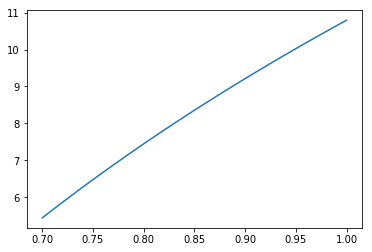

In [54]:
l_y = r_loop()
r = np.arange(0.7,1.0,.01)
plt.plot(r, l_y)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


Text(0.5, 1.07, '$ly\\ values$')

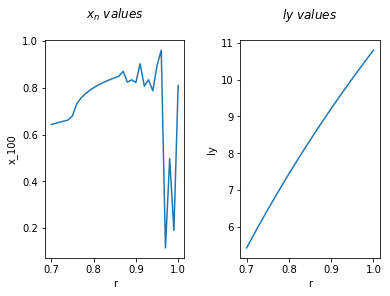

In [53]:
f, axarr = plt.subplots(1, 2)
f.subplots_adjust(wspace=0.4)

l_y = r_loop()
x_100 = x_n_array(0.7,1.0,0.01)
r = np.arange(0.7,1.0,.01)

#first panel - x_npo
axarr[0].plot(r, x_100)
axarr[0].set_xlabel('r')
axarr[0].set_ylabel('x_100')
axarr[0].set_title('$x_n\ values$', position=(0.5,1.07))
#second panel - ly
axarr[1].plot(r, l_y)
axarr[1].set_xlabel('r')
axarr[1].set_ylabel('ly')
axarr[1].set_title('$ly\ values$',position=(0.5,1.07))

Animation

In [130]:
def animate(i):
    l.set_data(t[:i], x[:i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


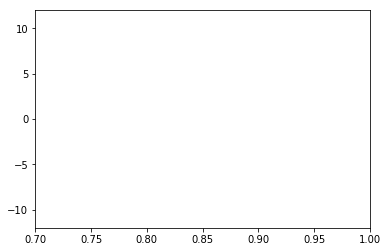

In [137]:

l_y = r_loop()
x_100 = x_n_array(0.7,1.0,0.01)
r = np.arange(0.7,1.0,.01)



t = np.linspace(0.7,1.0)
x = np.cos(t)

fig, ax = plt.subplots()
ax.axis([0.7,1.0,-12.0,12.0])
l, = ax.plot([],[])
#l, = ax.plot(l_y,r)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=30)

from IPython.display import HTML
HTML(ani.to_jshtml())

